In [3]:
library(bsts)
library(ggplot2)
library(reshape2)
ows_data = read.csv("ows_top300_words_time_series.csv", 
                    sep = ",",
                    header = T, 
                    stringsAsFactors = F, 
                    encoding= "utf-8")
#ows_data <- log10(ows_data)

In [4]:
head(ows_data)

date,ows,the,to,of,a,in.,is,occupy,and,⋯,end,very,top,every,vote,needs,law,again,nArrests,tweets_number
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
2011-10-06,50148,27555,16751,12821,10044,8014,10251,4196,8336,⋯,510,327,257,373,163,394,198,347,18,557113
2011-10-07,66009,37014,21474,15798,13619,10791,13969,6831,11040,⋯,549,635,351,375,346,445,186,284,0,732227
2011-10-08,66184,33952,21844,16100,14682,11163,12962,5921,10794,⋯,927,397,351,472,432,401,135,333,0,744921
2011-10-09,65218,36270,23061,18008,16614,11074,14746,6085,11562,⋯,554,496,388,421,509,400,232,268,0,748668
2011-10-10,79067,43543,26609,19576,17275,12492,16549,9629,13481,⋯,711,446,976,411,1424,581,283,364,32,895865
2011-10-11,67772,36416,23350,17293,13435,12241,14238,7417,11668,⋯,505,534,825,447,844,515,253,341,151,780924


In [5]:
ss <- AddLocalLinearTrend(list(), ows_data$tweets_number)
ss <- AddSeasonal(ss, ows_data$tweets_number, nseasons = 10)
bsts.reg <- bsts(tweets_number ~ ., data = ows_data,
                 state.specification = ss, 
                 niter = 1000, ping= 0, seed = 1)

In [6]:
### Get the number of burn-ins to discard
burn <- SuggestBurn(0.1, bsts.reg)

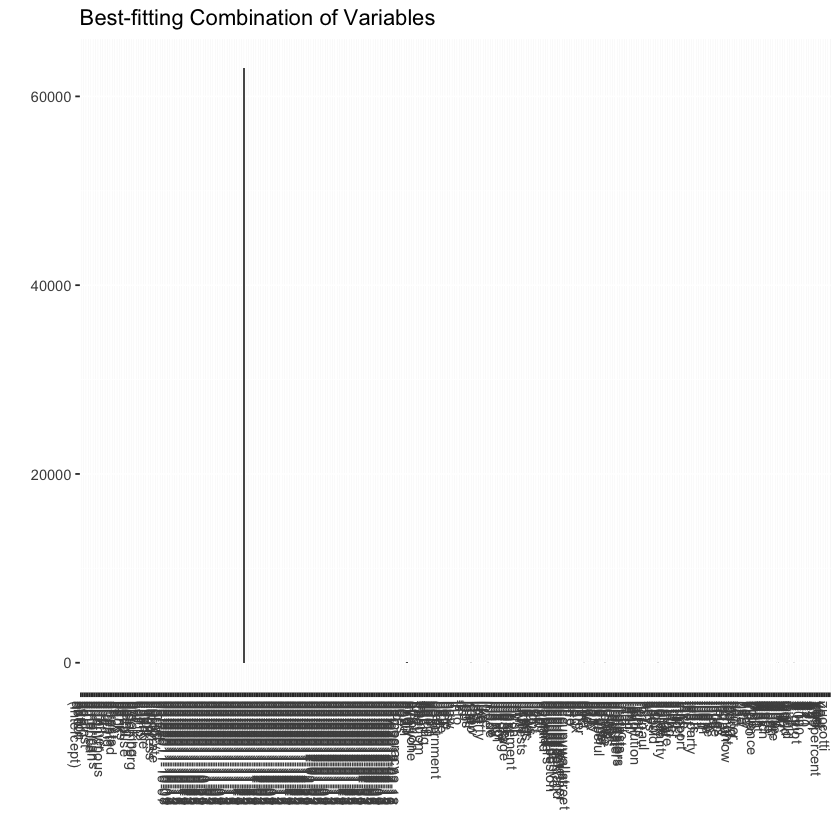

In [7]:
### Helper function to get the positive mean of a vector
PositiveMean <- function(b) {
  b <- b[abs(b) > 0]
  if (length(b) > 0) 
    return(mean(b))
  return(0)
}
### Get the average coefficients when variables were selected (non-zero slopes)
coeff <- data.frame(melt(apply(bsts.reg$coefficients[-(1:burn),], 2, PositiveMean)))
coeff$Variable <- as.character(row.names(coeff))
ggplot(data=coeff, aes(x=Variable, y=value)) + 
  geom_bar(stat="identity", position="identity") + 
  theme(axis.text.x=element_text(angle = -90, hjust = 0)) +
  xlab("") + ylab("") + ggtitle("Best-fitting Combination of Variables")

In [20]:
#abs(coeff$value)
coeff[order(abs(coeff$value)),]


,value,Variable
,<dbl>,<chr>
(Intercept),0,(Intercept)
date2011-10-07,0,date2011-10-07
date2011-10-08,0,date2011-10-08
date2011-10-09,0,date2011-10-09
date2011-10-10,0,date2011-10-10
date2011-10-11,0,date2011-10-11
date2011-10-12,0,date2011-10-12
date2011-10-13,0,date2011-10-13
date2011-10-14,0,date2011-10-14


In [22]:
### Inclusion probabilities -- i.e., how often were the variables selected 
inclusionprobs <- melt(colMeans(bsts.reg$coefficients[-(1:burn),] != 0))
inclusionprobs$Variable <- as.character(row.names(inclusionprobs))
# ggplot(data=inclusionprobs, aes(x=Variable, y=value)) + 
#   geom_bar(stat="identity", position="identity") + 
#   theme(axis.text.x=element_text(angle = -90, hjust = 0)) + 
#   xlab("") + ylab("") + ggtitle("Best-fitting Combination of Variables")

In [11]:
ss0 <- AddLocalLevel(list(), ows_data$tweets_number)
ss1 <- AddSeasonal(ss0, y = ows_data$tweets_number, nseasons = 10, season.duration = 2)
trend.model <- bsts(ows_data$tweets_number, ss0, niter = 1000, seed = 1)
trend.seasonal.model <- bsts(ows_data$tweets_number, ss1, niter = 1000, seed = 1)

model1<- bsts(tweets_number ~ ows_data[,"country"], data = ows_data, niter = 1000, state.specification=ss0,
              expected.model.size = 3, seed = 1)

=-=-=-=-= Iteration 0 Sat Oct  2 05:17:08 2021 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Oct  2 05:17:08 2021 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Oct  2 05:17:09 2021 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Oct  2 05:17:09 2021 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Oct  2 05:17:09 2021 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Oct  2 05:17:09 2021 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Oct  2 05:17:09 2021 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Oct  2 05:17:09 2021 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Oct  2 05:17:09 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Oct  2 05:17:09 2021 =-=-=-=-=
=-=-=-=-= Iteration 0 Sat Oct  2 05:17:10 2021 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Oct  2 05:17:10 2021 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Oct  2 05:17:10 2021 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Oct  2 05:17:10 2021 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Oct  2 05:17:10 2021 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Oct  2 05:17:11 2021 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Oct  2 05:17:11 2021 =-=-=-=-=
=

In [21]:
model2<- bsts(tweets_number ~ ows_data[,"country"]+ ows_data[, "job"], 
              data = ows_data, niter = 1000, state.specification=ss0,
              expected.model.size = 3,  seed = 1)

=-=-=-=-= Iteration 0 Sat Oct  2 05:22:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Oct  2 05:22:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Oct  2 05:22:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Oct  2 05:22:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Oct  2 05:22:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Oct  2 05:22:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Oct  2 05:22:23 2021 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Oct  2 05:22:23 2021 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Oct  2 05:22:23 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Oct  2 05:22:23 2021 =-=-=-=-=


In [23]:
model3<- bsts(tweets_number ~ ows_data[,"country"]+ ows_data[,"job"]+ ows_data[,"congress"],
              data = ows_data, niter = 1000, state.specification=ss0,
              expected.model.size = 3, seed = 1)

=-=-=-=-= Iteration 0 Sat Oct  2 05:23:44 2021 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Oct  2 05:23:44 2021 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Oct  2 05:23:44 2021 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Oct  2 05:23:44 2021 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Oct  2 05:23:44 2021 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Oct  2 05:23:44 2021 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Oct  2 05:23:45 2021 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Oct  2 05:23:45 2021 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Oct  2 05:23:45 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Oct  2 05:23:45 2021 =-=-=-=-=


In [24]:
model4<- bsts(tweets_number ~ ows_data[,"country"]+ ows_data[,"job"]+ ows_data[,"congress"]+ ows_data[,"peaceful"],
              data = ows_data, niter = 1000, state.specification=ss0,
              expected.model.size = 3, seed = 1)

=-=-=-=-= Iteration 0 Sat Oct  2 05:24:07 2021 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Oct  2 05:24:07 2021 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Oct  2 05:24:07 2021 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Oct  2 05:24:07 2021 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Oct  2 05:24:08 2021 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Oct  2 05:24:08 2021 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Oct  2 05:24:08 2021 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Oct  2 05:24:08 2021 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Oct  2 05:24:08 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Oct  2 05:24:08 2021 =-=-=-=-=


In [25]:
model5<- bsts(tweets_number ~ ows_data[,"country"]+ ows_data[,"job"]+ ows_data[,"congress"]+ ows_data[,"peaceful"]+ ows_data[,"ows"],
              data = ows_data, niter = 1000, state.specification=ss0,
              expected.model.size = 3, seed = 1)

=-=-=-=-= Iteration 0 Sat Oct  2 05:24:55 2021 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Oct  2 05:24:55 2021 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Oct  2 05:24:55 2021 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Oct  2 05:24:56 2021 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Oct  2 05:24:56 2021 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Oct  2 05:24:56 2021 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Oct  2 05:24:56 2021 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Oct  2 05:24:56 2021 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Oct  2 05:24:56 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Oct  2 05:24:56 2021 =-=-=-=-=


In [26]:
model6<- bsts(tweets_number ~ ows_data[,"country"]+ ows_data[,"job"]+ ows_data[,"congress"]+ ows_data[,"peaceful"]+ ows_data[,"ows"]+ ows_data[,"people"],
              data = ows_data, niter = 1000, state.specification=ss0,
              expected.model.size = 3, seed = 1)

=-=-=-=-= Iteration 0 Sat Oct  2 05:25:58 2021 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Oct  2 05:25:58 2021 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Oct  2 05:25:58 2021 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Oct  2 05:25:58 2021 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Oct  2 05:25:58 2021 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Oct  2 05:25:58 2021 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Oct  2 05:25:59 2021 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Oct  2 05:25:59 2021 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Oct  2 05:25:59 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Oct  2 05:25:59 2021 =-=-=-=-=


In [27]:
model <- bsts(tweets_number ~ ., data = ows_data,
              niter = 1000, state.specification=ss0,
              expected.model.size = 3,
              seed = 1)

=-=-=-=-= Iteration 0 Sat Oct  2 05:26:21 2021 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Oct  2 05:26:21 2021 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Oct  2 05:26:21 2021 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Oct  2 05:26:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Oct  2 05:26:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Oct  2 05:26:23 2021 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Oct  2 05:26:23 2021 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Oct  2 05:26:24 2021 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Oct  2 05:26:24 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Oct  2 05:26:25 2021 =-=-=-=-=


Warning message in min(ows_data$daliy_tweets):
“min里所有的参数都不存在; 回覆Inf”Warning message in max(ows_data$daliy_tweets):
“max里所有的参数都不存在；回覆-Inf”

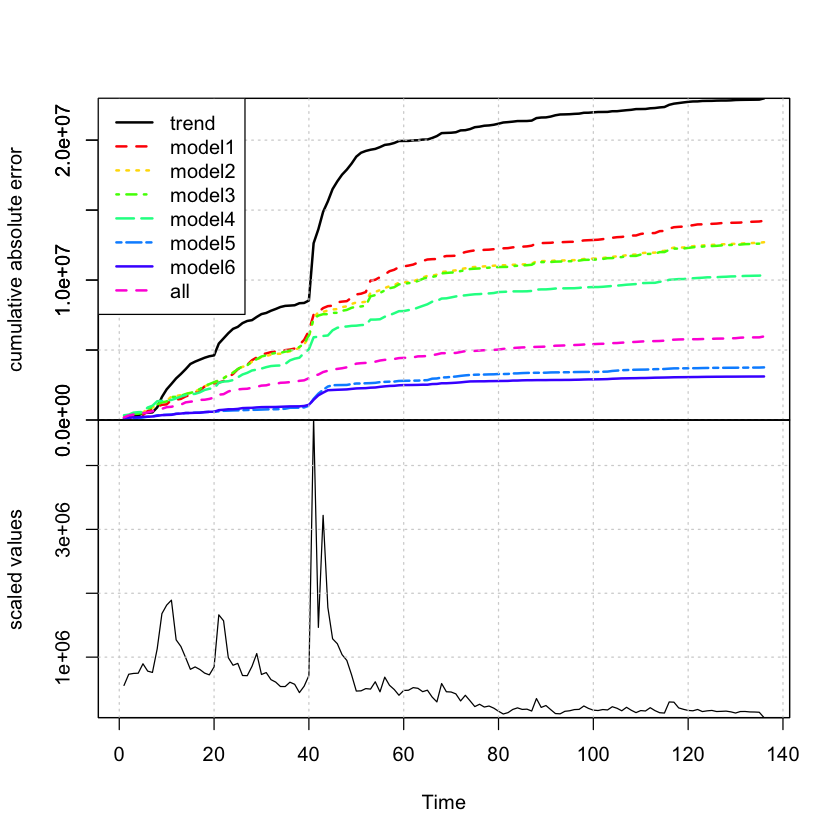

In [28]:
CompareBstsModels(list(trend = trend.model,
                       #"trend and seasonal" = trend.seasonal.model,
                       "model1"=model1,
                       "model2"=model2,
                       "model3"=model3,
                       "model4"=model4,
                       "model5"=model5,
                       "model6"=model6,
                       "all"=model), 
                  xlab = "Time",
                  burn = 150)
scope = c(min(ows_data$daliy_tweets), max(ows_data$daliy_tweets))
r.square = function(model) as.character(round(summary(model)$relative.gof, 3))

In [32]:
pdf(file = "Figure_7-3_ows.pdf",   # The directory you want to save the file in
    width = 8, # The width of the plot in inches
    height = 8) # The height of the plot in inches

CompareBstsModels(list(trend = trend.model,
                       #"trend and seasonal" = trend.seasonal.model,
                       "model1"=model1,
                       "model2"=model2,
                       "model3"=model3,
                       "model4"=model4,
                       "model5"=model5,
                       "model6"=model6,
                       "all"=model), 
                  xlab = "Time",
                  burn = 150)
scope = c(min(ows_data$daliy_tweets), max(ows_data$daliy_tweets))
r.square = function(model) as.character(round(summary(model)$relative.gof, 3))

# Step 3: Run dev.off() to create the file!
dev.off()

Warning message in min(ows_data$daliy_tweets):
“min里所有的参数都不存在; 回覆Inf”Warning message in max(ows_data$daliy_tweets):
“max里所有的参数都不存在；回覆-Inf”

pdf 
  2

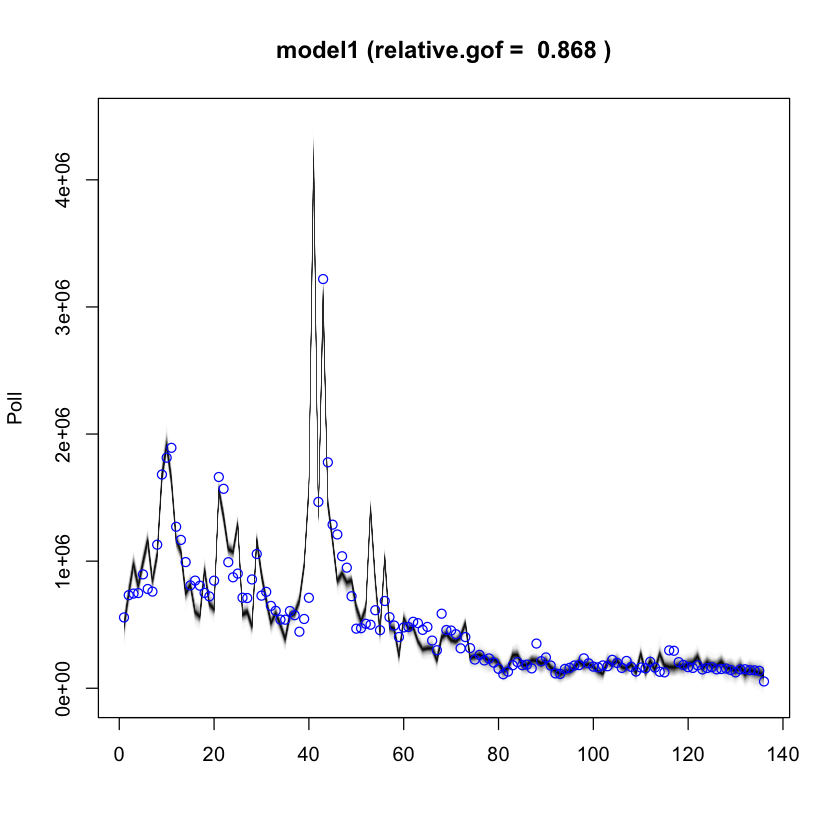

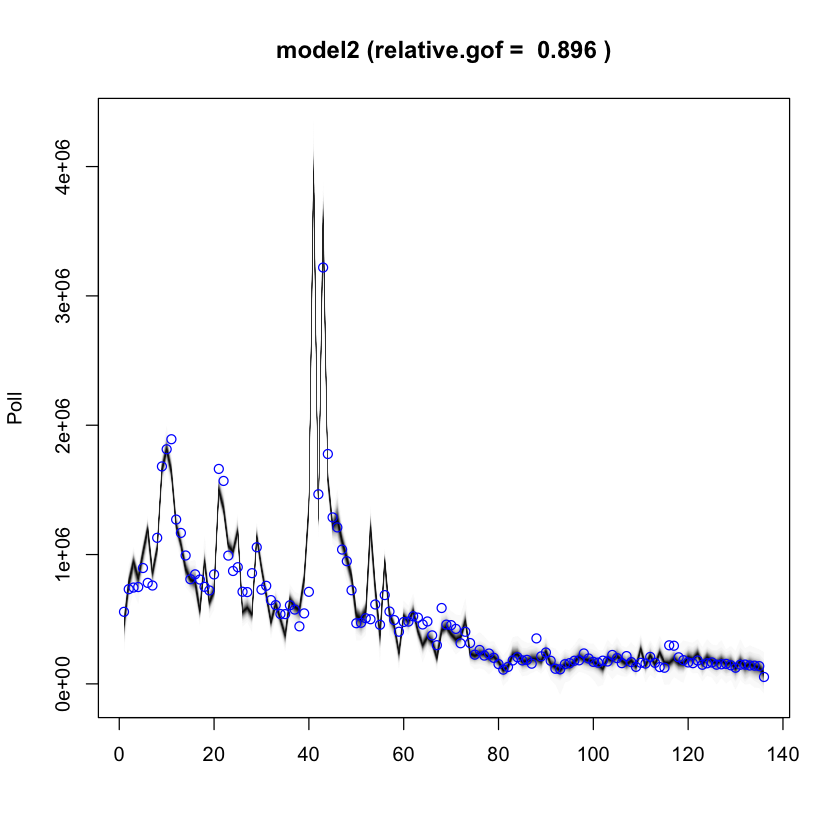

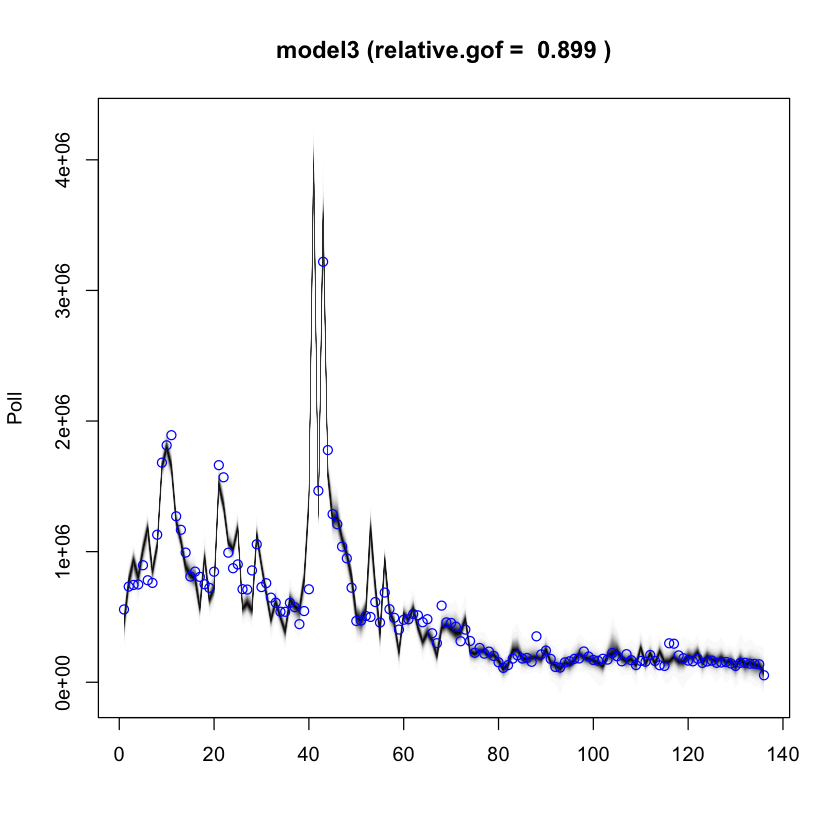

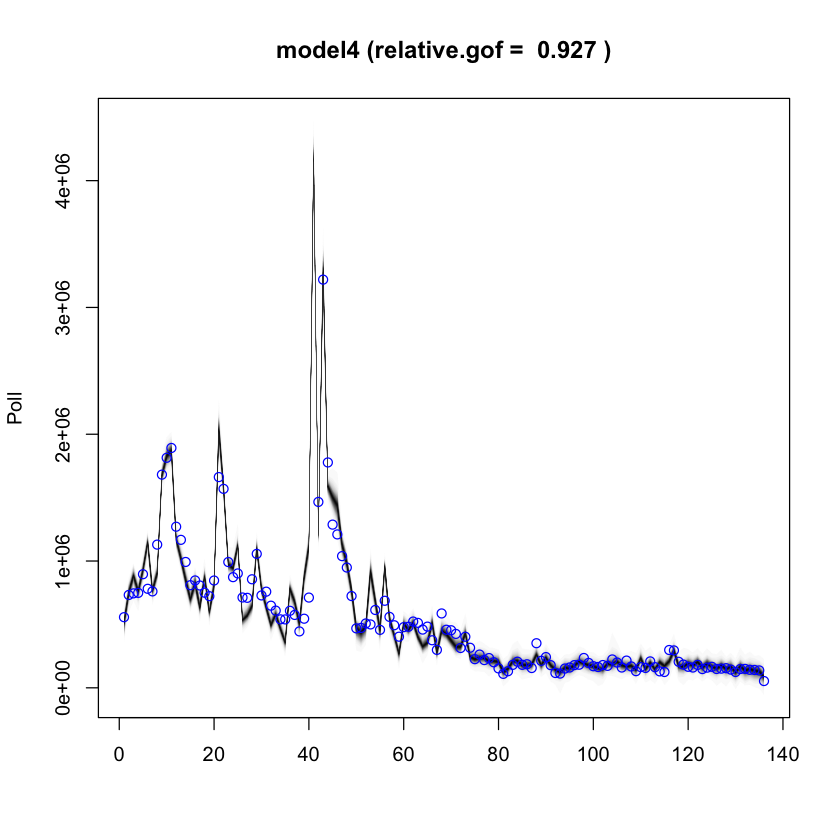

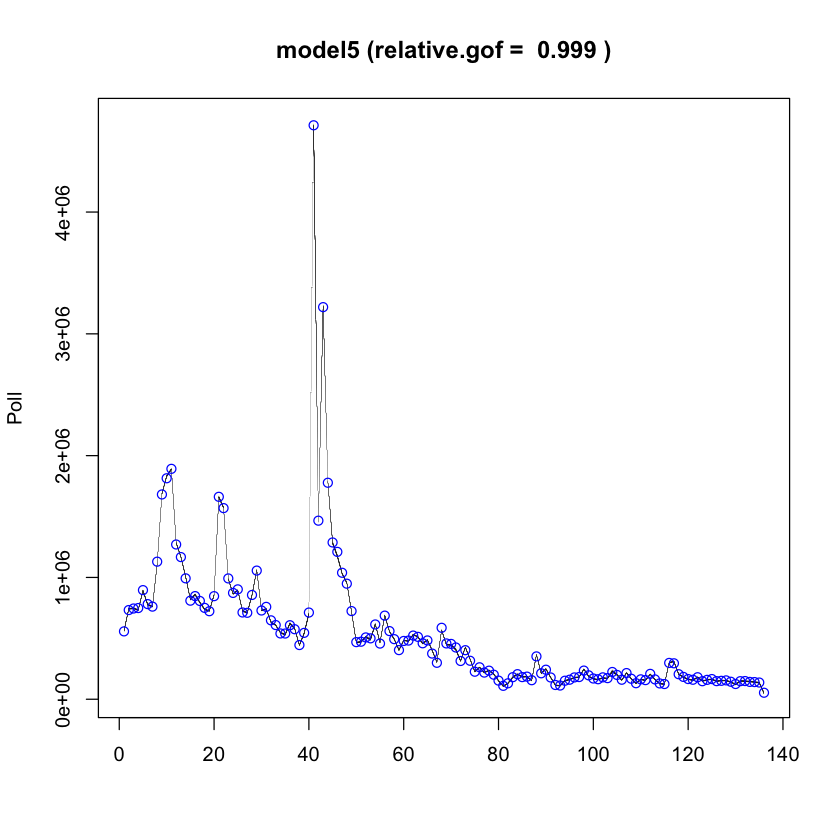

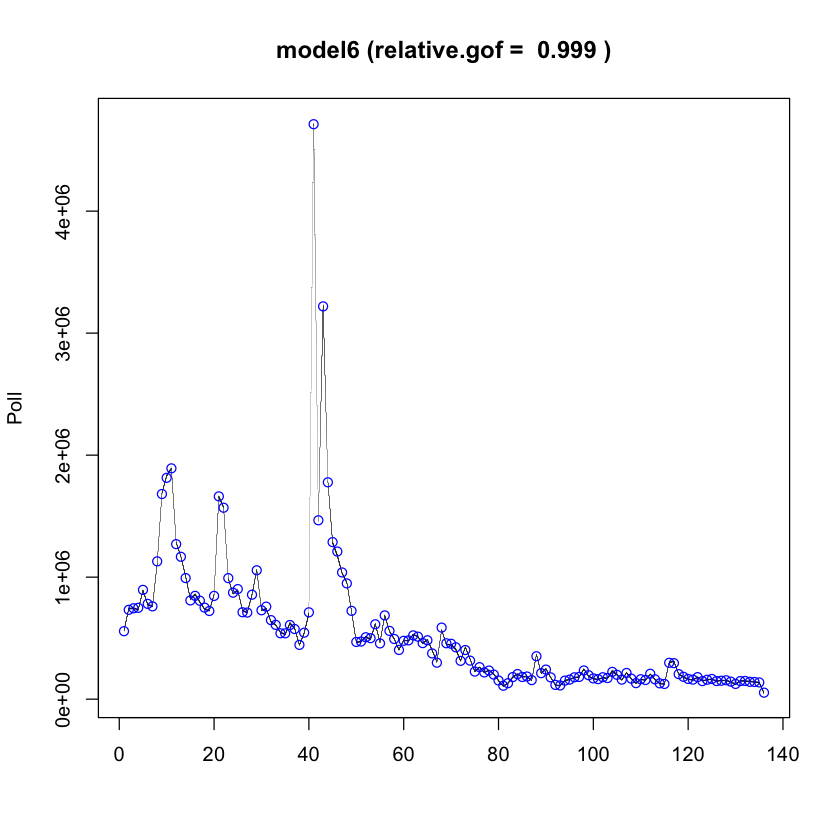

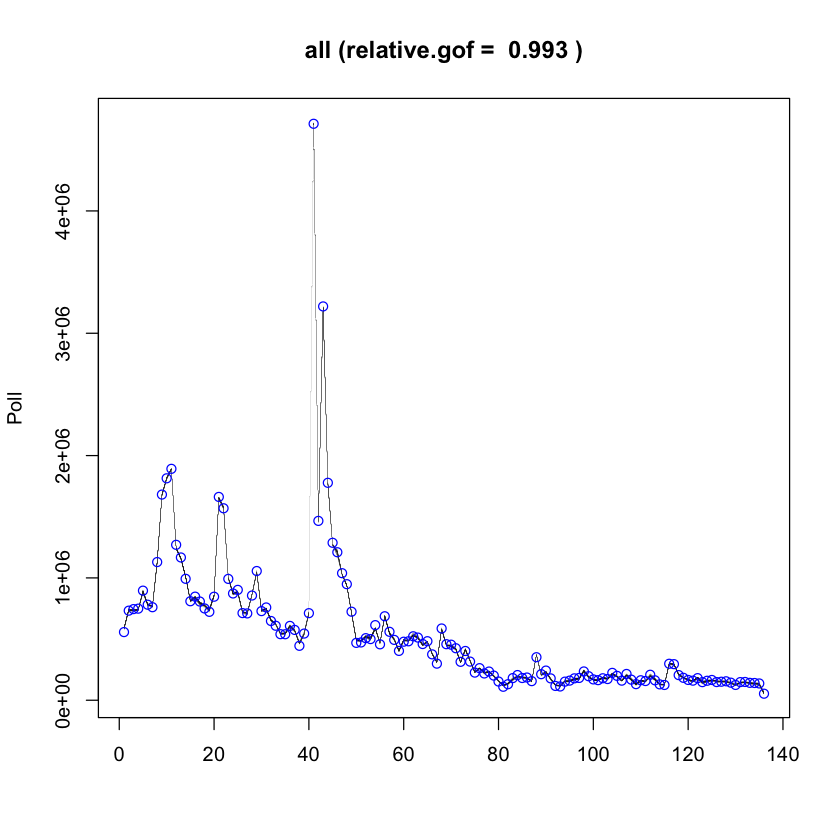

In [29]:
plot(model1, ylim = scope, main = paste('model1 (relative.gof = ', r.square(model1), ')'), xlab = "", ylab = "Poll")
plot(model2, ylim = scope, main = paste('model2 (relative.gof = ', r.square(model2), ')'), xlab = "", ylab = "Poll")
plot(model3, ylim = scope, main = paste('model3 (relative.gof = ', r.square(model3), ')'), xlab = "", ylab = "Poll")
plot(model4, ylim = scope, main = paste('model4 (relative.gof = ', r.square(model4), ')'), xlab = "", ylab = "Poll")
plot(model5, ylim = scope, main = paste('model5 (relative.gof = ', r.square(model5), ')'), xlab = "", ylab = "Poll")
plot(model6, ylim = scope, main = paste('model6 (relative.gof = ', r.square(model6), ')'), xlab = "", ylab = "Poll")
plot(model, ylim = scope, main = paste('all (relative.gof = ', r.square(model), ')'), xlab = "", ylab = "Poll")

=-=-=-=-= Iteration 0 Sat Oct  2 05:27:20 2021 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Oct  2 05:27:21 2021 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Oct  2 05:27:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Oct  2 05:27:23 2021 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Oct  2 05:27:24 2021 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Oct  2 05:27:25 2021 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Oct  2 05:27:27 2021 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Oct  2 05:27:28 2021 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Oct  2 05:27:29 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Oct  2 05:27:30 2021 =-=-=-=-=


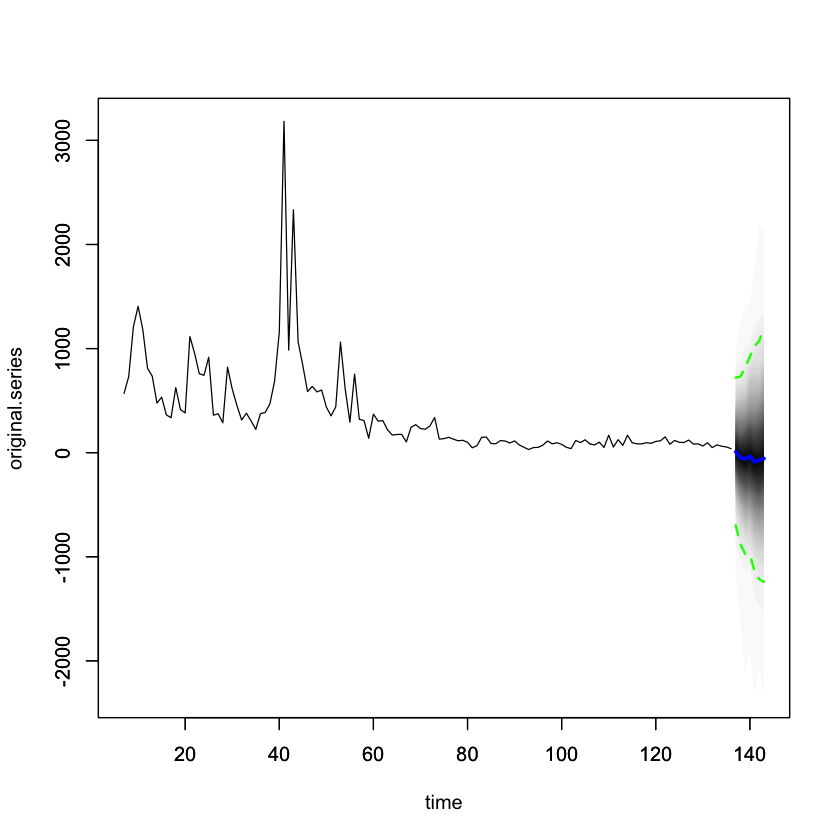

In [30]:
ss <- AddLocalLinearTrend(list(), ows_data$country)
ss <- AddSeasonal(ss, ows_data$country, nseasons = 52)
model_pred <- bsts(ows_data$country,
               state.specification = ss,
               niter = 1000)
pred1 <- predict(model_pred, horizon = 7, burn = 100)
plot(pred1, plot.original = 130)